# Download the data, combine with background and binning example (4C+21.35, flare)

**This tutotrial walks through all the steps needed in creating the combined data set (source + background), and binning the data for the blazar (4C+21.35, flare).**

**For the background we use just the albedo photons.**

**To run this, you need the following files (available on wasabi)**

- COSI-SMEX/DC3/Data/Sources/4C21p35_flare_3months_unbinned_data_filtered_with_SAAcut.fits.gz 
- COSI-SMEX/DC3/Data/Backgrounds/Ge/AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz  
 

In [1]:
from cosipy import COSILike, BinnedData
from cosipy.spacecraftfile import SpacecraftFile
from cosipy.response.FullDetectorResponse import FullDetectorResponse
from cosipy.util import fetch_wasabi_file

from scoords import SpacecraftFrame

from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.stats import poisson_conf_interval

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from threeML import Band, PointSource, Model, JointLikelihood, DataList
from cosipy import Band_Eflux
from astromodels import Parameter

from pathlib import Path

import os
import corner
from threeML import*


08:09:00 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=655215;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=992135;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=735978;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=863592;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=304566;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=512647;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

         INFO      Starting 3ML!                                                                     ]8;id=794661;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=186786;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=862003;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=735927;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=452864;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=759150;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=56629;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=408187;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#44\44]8;;\

08:09:00 WARNING   ROOT minimizer not available                                                ]8;id=532963;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=138004;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=312535;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=195598;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=109751;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=690446;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=93715;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=473094;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=577858;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=117463;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=492343;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=489524;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=281106;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=935429;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=880570;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=648834;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=882930;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=33815;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=909324;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=563333;file:///home/srinadb/miniconda3/envs/cosipy_developer/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

## Get the data

Define the path to the directory to save the data. The data can be downloaded by running the cells below. Each respective cell also gives the wasabi file path and file size.

In [2]:
data_path = Path("/home/srinadb/cosipy/docs/tutorials/spectral_fits/dataset")


Download the source file (9.7 MB)

In [3]:
# 4C+21.35 source
# File size: 9.7 MB

fetch_wasabi_file('COSI-SMEX/DC3/Data/Sources/4C21p35_flare_3months_unbinned_data_filtered_with_SAAcut.fits.gz', output=str(data_path / '4C21p35_flare_3months_unbinned_data_filtered_with_SAAcut.fits.gz'))


{
    "AcceptRanges": "bytes",
    "LastModified": "Thu, 13 Feb 2025 17:00:49 GMT",
    "ContentLength": 18935412,
    "ETag": "\"3ddeed0ad1e01accc413fa5cffcfc13e\"",
    "ContentType": "application/gzip",
    "Metadata": {}
}


Download the background file (2.7 GB)

In [4]:
# albedo photons
# File size: 2.7 GB
fetch_wasabi_file('COSI-SMEX/DC3/Data/Backgrounds/Ge/AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz', output=str(data_path / 'AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz'))


{
    "AcceptRanges": "bytes",
    "LastModified": "Mon, 17 Feb 2025 14:26:03 GMT",
    "ContentLength": 2903157095,
    "ETag": "\"80f088590996182860c195d0a383a6c9-29\"",
    "ContentType": "application/gzip",
    "Metadata": {}
}


Create the combined data

We will combine the 4C+21.35 source and the albedo photon background, which will be used as our dataset. This only needs to be done once. You can skip this cell if you already have the combined data file.


In [5]:
# Define instance of binned data class:
instance = BinnedData("blazar.yaml")

# Combine files:
input_files = ["/home/srinadb/cosipy/docs/tutorials/spectral_fits/dataset/AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz","/home/srinadb/cosipy/docs/tutorials/spectral_fits/dataset/4C21p35_flare_3months_unbinned_data_filtered_with_SAAcut.fits.gz"]
instance.combine_unbinned_data(input_files, output_name="4C21p35_flare_AlbedoPhoton_bkg")


Bin the data

You only have to do this once, and after you can start by loading the binned data directly. You can skip this cell if you already have the binned data files.

In [6]:
# Bin 4C+21.35:
flare = BinnedData("blazar.yaml")
flare.get_binned_data(unbinned_data="/home/srinadb/cosipy/docs/tutorials/spectral_fits/dataset/4C21p35_flare_3months_unbinned_data_filtered_with_SAAcut.fits.gz", output_name="4C21p35_flare_binned_data")


In [7]:
# Bin background:
bg_tot = BinnedData("blazar.yaml")
bg_tot.get_binned_data(unbinned_data="/home/srinadb/cosipy/docs/tutorials/spectral_fits/dataset/AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz", output_name="AlbedoPhoton_bkg_binned_data")


In [8]:
# Bin combined data:
data_combined = BinnedData("blazar.yaml")
data_combined.get_binned_data(unbinned_data="/home/srinadb/cosipy/docs/tutorials/spectral_fits/continuum_fit/blazar/4C21p35_flare_AlbedoPhoton_bkg.fits.gz", output_name="4C21p35_flare_AlbedoPhoton_bkg_binned_data")


### Flare

In [9]:
# https://github.com/cositools/cosi-sim/blob/main/cosi_sim/Source_Library/DC3/sources/Extragalactic/4C21p35_flare/4C_21_spectrum_flare.dat

total_integrated_flux = 0.017293201590129727 # ph/cm^2/s
alpha = -2.5

# F_int = (K / (E_piv^alpha * (alpha+1))) * [ E_max^(alpha+1) - E_min^(alpha+1) ]
# K = F_int * (E_piv^alpha * (alpha+1)) / [ E_max^(alpha+1) - E_min^(alpha+1) ]

E_min = 100.0
E_max = 10000.0
E_piv = 1000000

n = total_integrated_flux * (E_piv**alpha) * (1+alpha)
d = (E_max**(1+alpha) - E_min**(1+alpha))

k = n/d
print(k)

2.596576815334794e-14


In [10]:
# https://github.com/cositools/cosi-sim/blob/main/cosi_sim/Source_Library/DC3/sources/Extragalactic/4C21p35_flare/4C_21_spectrum_flare.dat

import math 

# --- Configuration ---
FILENAME = './4C_21_spectrum_flare.dat'  # Name of your data file


# --- Main Script Logic ---
e_values = []
spec_values = []

# Check if file exists
if not os.path.exists(FILENAME):
    print(f"Error: File not found at '{FILENAME}'")
    exit() # Stop execution if file doesn't exist

# Read the file and process data lines
try:
    with open(FILENAME, 'r') as f:
        for i, line in enumerate(f):
            line = line.strip() # Remove leading/trailing whitespace
            if line.startswith('DP '):
                parts = line.split()
                if len(parts) >= 3:
                    try:
                        energy_kev = float(parts[1])
                        spectrum = float(parts[2]) # This is dN/dE
                
                        e_values.append(energy_kev)
                        spec_values.append(spectrum)

                    except ValueError:
                        print(f"Warning: Could not parse numbers on line {i+1}: '{line}'. Skipping.")
                    except IndexError:
                         print(f"Warning: Not enough columns on line {i+1}: '{line}'. Skipping.")
                else:
                    print(f"Warning: Malformed 'DP' line {i+1}: '{line}'. Skipping.")

except IOError as e:
    print(f"Error reading file '{FILENAME}': {e}")
    exit()

print("-" * 30)



------------------------------


Text(0, 0.5, 'Flux[ph/cm2/sec/KeV]')

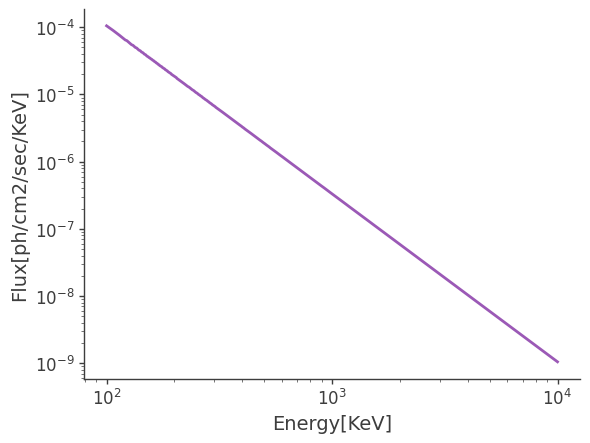

In [12]:
plt.plot(np.array(e_values), np.array(spec_values))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy[KeV]")
plt.ylabel("Flux[ph/cm2/sec/KeV]")


Text(0, 0.5, 'Flux[ph/cm2/sec/MeV]')

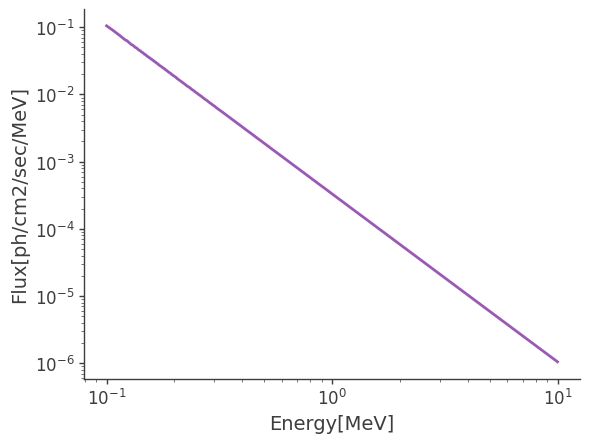

In [14]:
plt.plot(np.array(e_values)/1000.0, np.array(spec_values)*1000.0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy[MeV]")
plt.ylabel("Flux[ph/cm2/sec/MeV]")


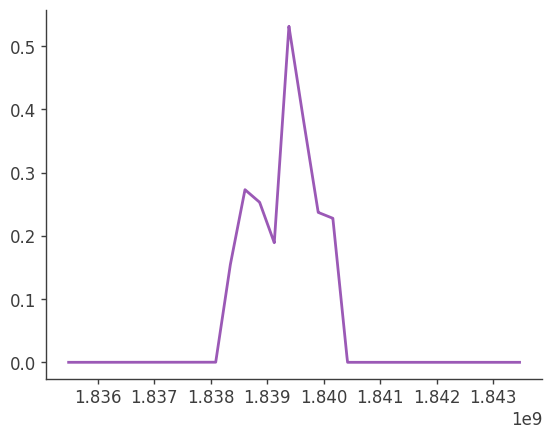

In [21]:
time_l = []
norm = []

with open('./4C_21_lightcurve_flare.dat', 'r') as file:
    lines = file.readlines()

for line in lines[2:]:
    tokens = line.split()  # split by whitespace
    if len(tokens) >= 3:   # we expect at least 3 tokens per data row
        try:
            # tokens[2] should be the relative value (e.g. "9.2e+00")
            value1 = float(tokens[1])
            value2 = float(tokens[2])
            time_l.append(value1)
            norm.append(value2)
        except ValueError:
            # If conversion fails, skip this line
            continue


plt.plot(time_l, norm)
# axs[1].axhline(y=simulated_flux, color='red', linestyle='--')
# plt.axhline(y=simulated_flux, color='red', linestyle='--')